# Problem Statement
  Develop a predictive model to determine the likelihood of diabetes in patients using the provided medical and demographic dataset. You are required to:
1.  Conduct Exploratory Data Analysis (EDA) and clean the dataset.
2.  Identify and handle outliers, missing values, and redundant features.
1.  Implement Logistic Regression from scratch.
2.  Evaluate and compare model performance using different data split ratios and classification metrics.

##Tasks
#Task 1 :  Exploratory Data Analysis (EDA) and Data Cleaning
# Objective:
Understand the dataset’s structure, distribution, and relationships from the dataset :
# Instructions:
Load the Dataset: Manually read the diabetes_prediction_dataset.csv file : [link text](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download) .

1.   Perform EDA:
      *   Summarize the dataset (mean, median, distribution, correlations).

      *   Visualize patterns using histograms, box plots, and scatter plots.



2.   Data Cleaning:
      *   Detect and handle missing values.
      *   Identify outliers and apply necessary transformations.
      *   Show a before-and-after comparison of the cleaned dataset.
    


Initial DataFrame shape: (100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Descriptive Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.51684

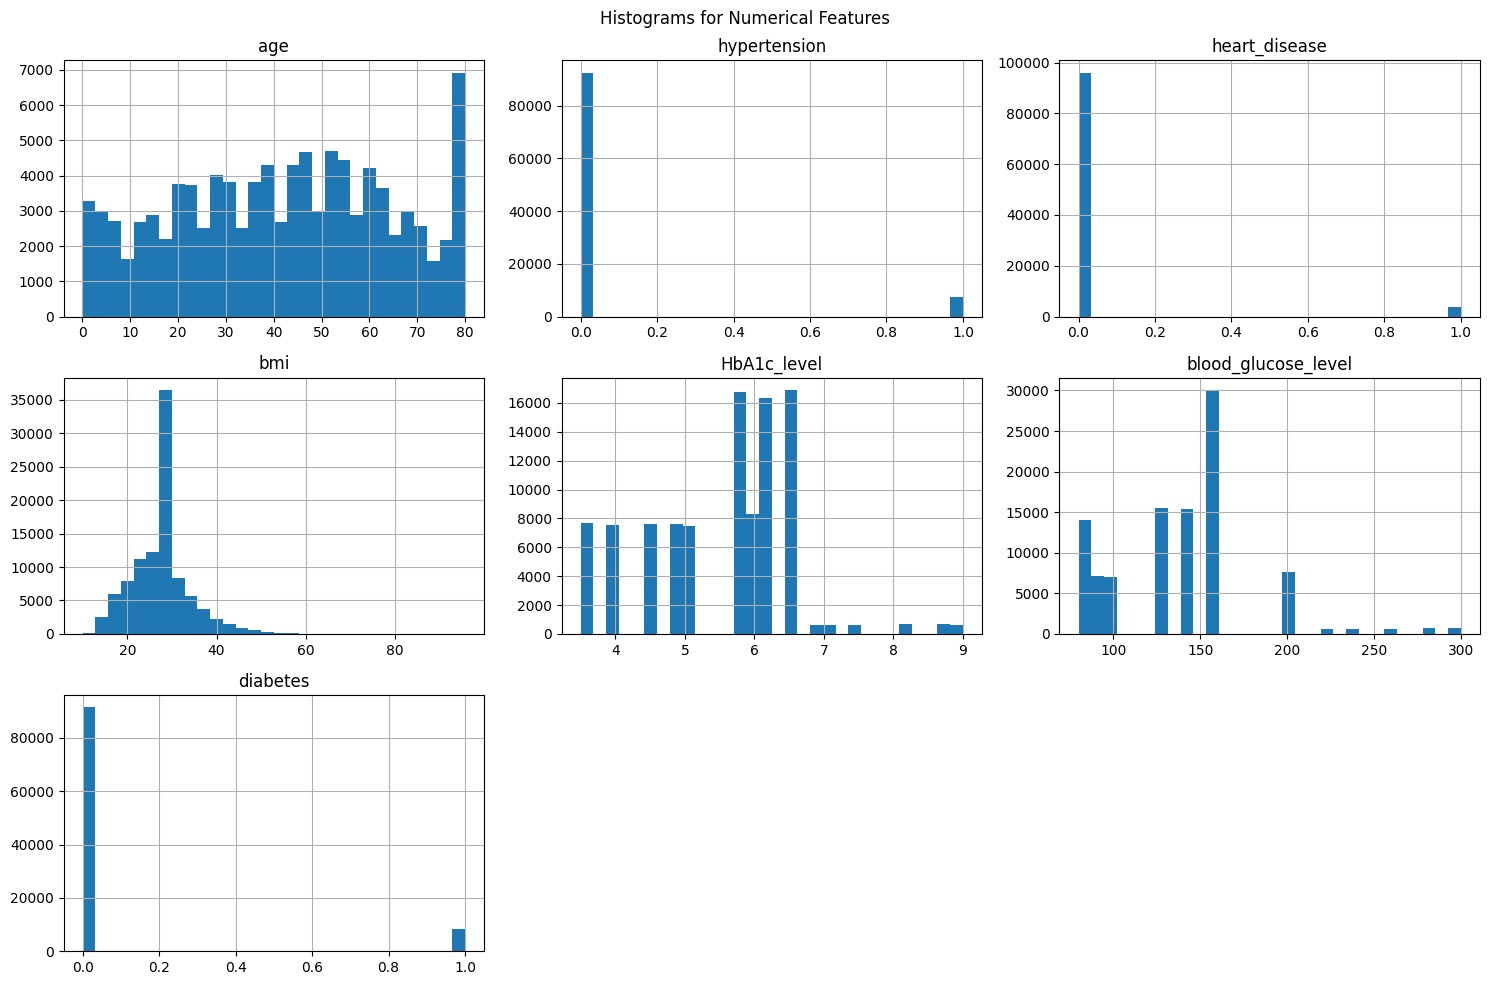

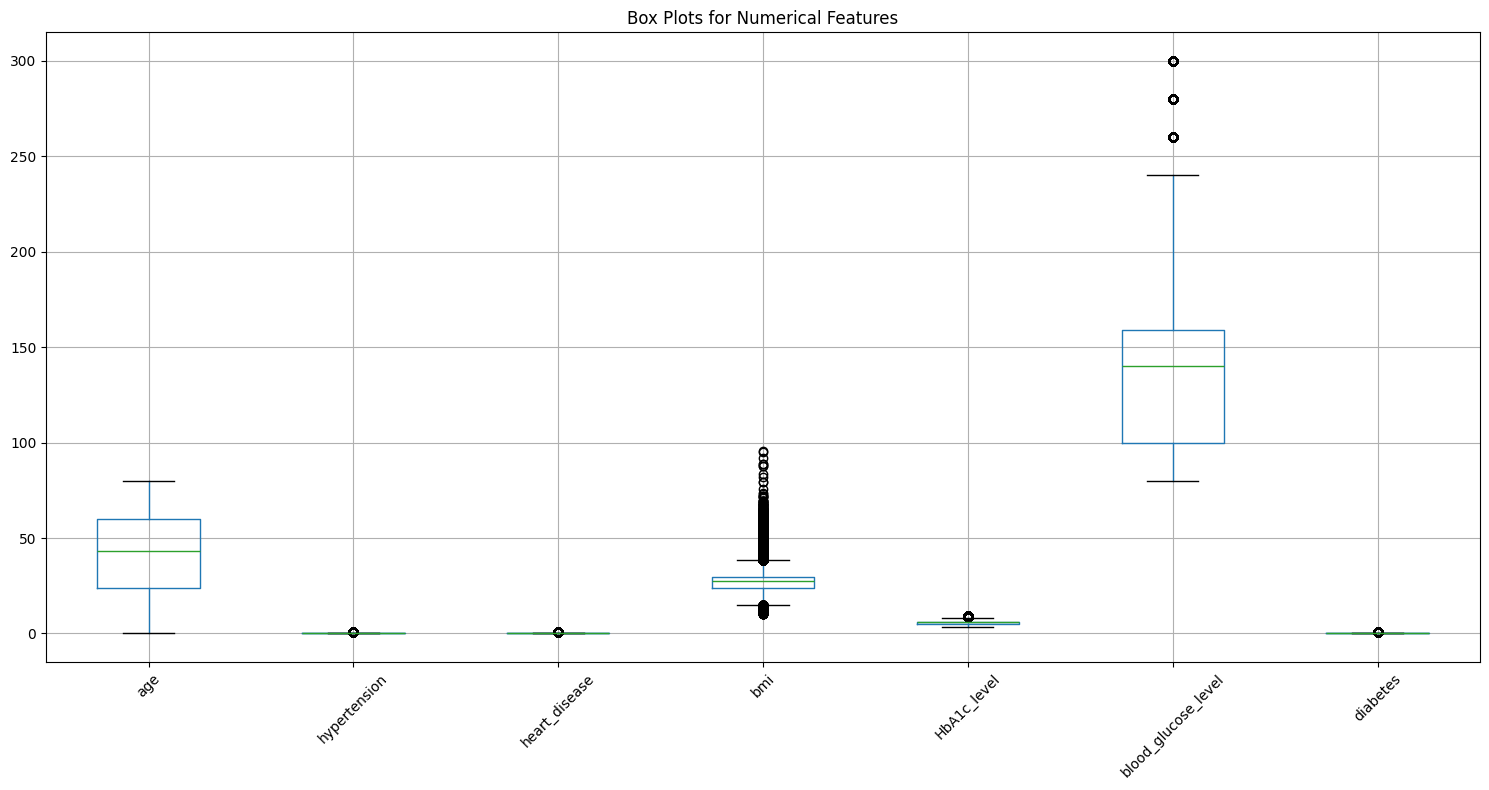

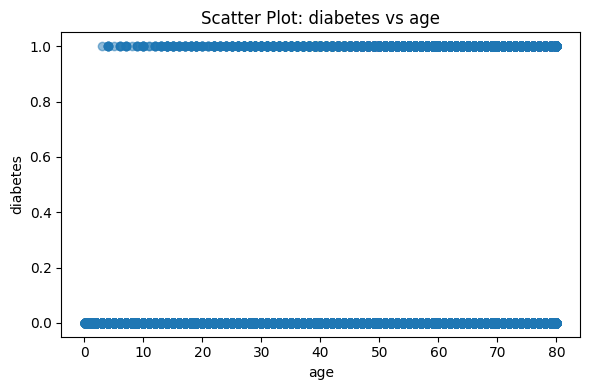

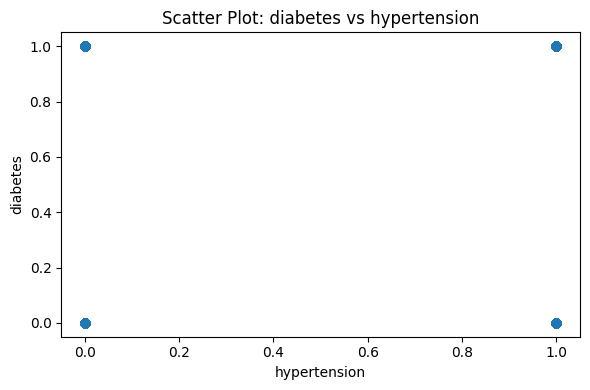

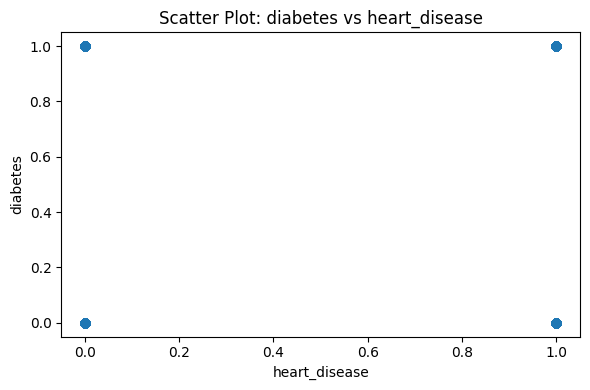

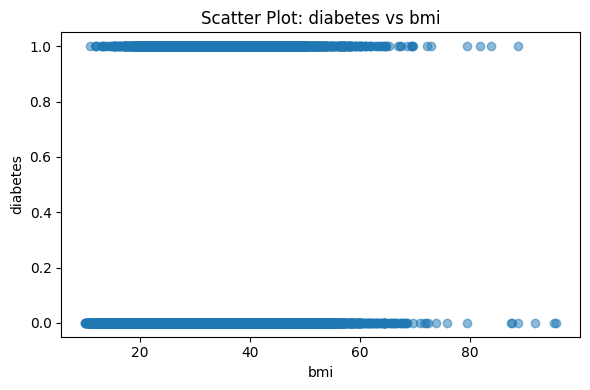

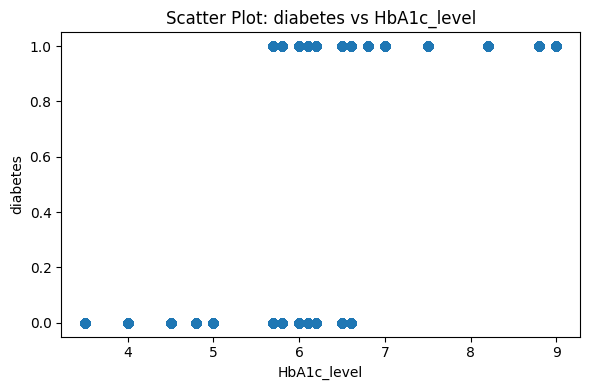

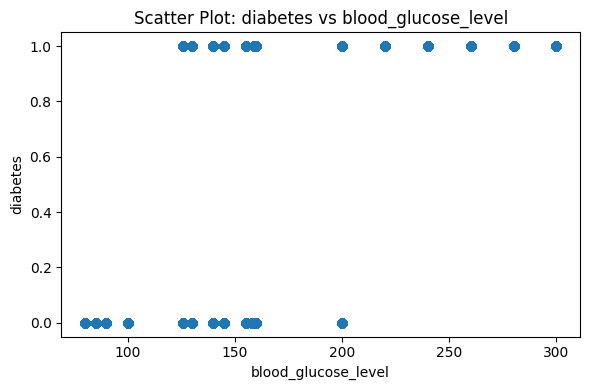

<ipython-input-1-d48af7e50c8f>:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
<ipython-input-1-d48af7e50c8f>:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


Missing values after cleaning:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Summary before capping outliers:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000    

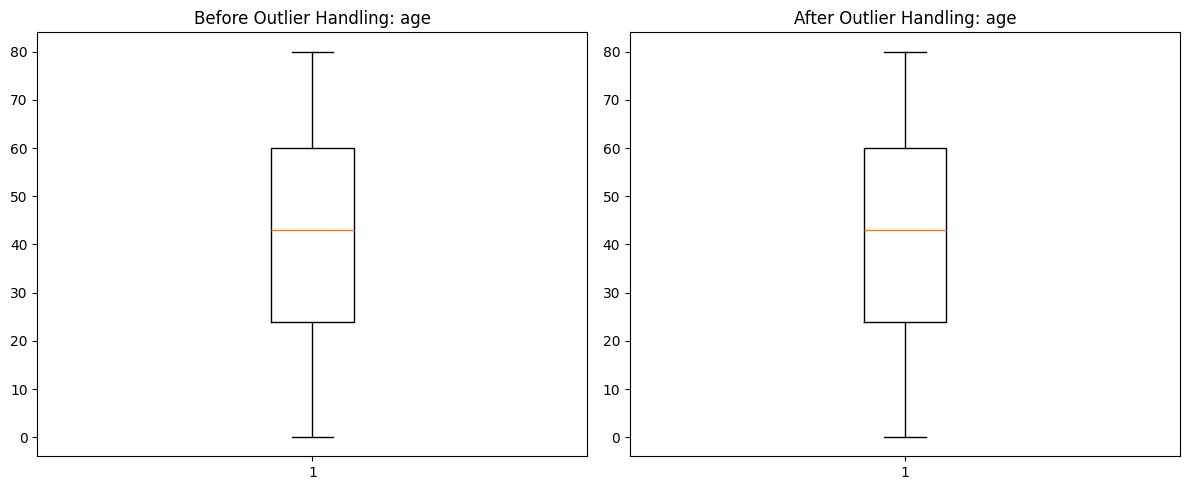

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_prediction_dataset.csv')


print("DF shape:", df.shape)
print(df.head())
print(" Stats:")
print(df.describe())

print("\n")

df_numeric_medians = df.select_dtypes(include=[np.number]).median()
print("Median values for numeric columns:")
print(df_numeric_medians)

print("\n")
print("Missing vals:")
print(df.isnull().sum())

df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Features')
plt.tight_layout()
plt.show()

print("\n")
plt.figure(figsize=(15, 8))
df.boxplot()
plt.title('Box Plots for Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n")

#diabetes as our target col
target_column = 'diabetes'


#doing scatter plot
if target_column:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    numeric_cols.remove(target_column)
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        plt.scatter(df[col], df[target_column], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.title(f'The Scater Plott: {target_column} vs {col}')
        plt.tight_layout()
        plt.show()



df_cleaned = df.copy()

# we fill numerical columns with the median for null vals 
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)

# we fill categorical columns with the mode for null vals 
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    mode_val = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_val, inplace=True)


print("after cleaning:")
print(df_cleaned.isnull().sum())

#upper bound and lower bound defined , those vals will be removed as outliers
def outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col.clip(lower=lower_bound, upper=upper_bound)


print("before outliers removal:")
print(df_cleaned.describe())


for col in num_cols:
    df_cleaned[col] = outliers(df_cleaned[col])

print("after outliers removal:")
print(df_cleaned.describe())


if num_cols:
    temp = num_cols[0]
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.boxplot(df[temp])
    plt.title(f'Before: {temp}')

    plt.subplot(1, 2, 2)
    plt.boxplot(df_cleaned[temp])
    plt.title(f'After: {temp}')
    plt.tight_layout()
    plt.show()




# Task 2: Feature Engineering & Selection
1.   Determine whether the dataset has redundant or unimportant features.
2.   Apply feature selection techniques and justify your choices.
1.   Show a comparison of dataset performance with and without feature selection.

In [ ]:
#same as before filling with null vals
numeric_col = df.select_dtypes(include=['number']).columns

for col in numeric_col:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
#outliers for ALL numeric cols
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


df_clean = df.copy()
for col in numeric_col:
    df_clean = remove_outliers(df_clean, col)

print("Original shape:", df.shape)
print("After outlier removal:", df_clean.shape)


Original shape: (100000, 9)
After outlier removal: (78637, 9)


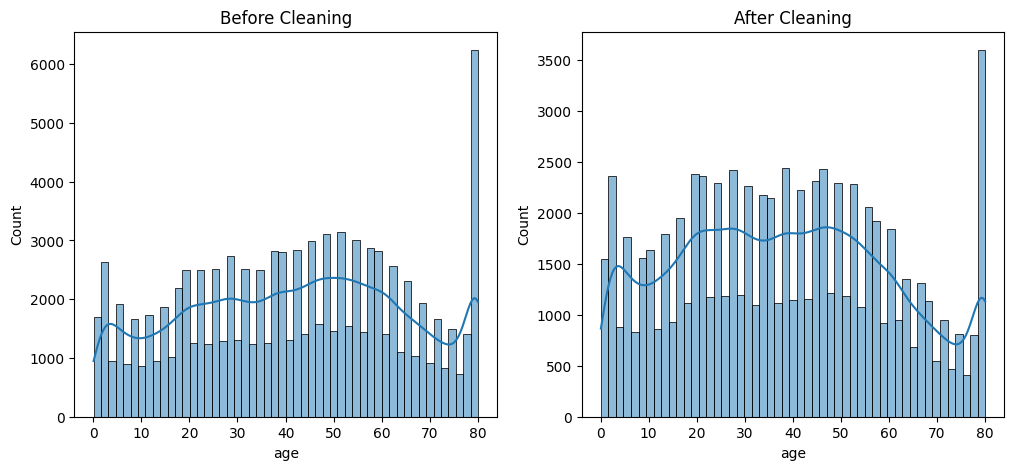

In [ ]:
#cleaned age column
import seaborn as sns
import matplotlib.pyplot as plt

feature = numeric_col[0]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df[feature], kde=True)
plt.title("Before Cleaning")

plt.subplot(1,2,2)
sns.histplot(df_clean[feature], kde=True)
plt.title("After Cleaning")
plt.show()


FEATURE ENGINEEERING

In [ ]:
#defined age group bins based on the person 'age'
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 30, 50, 100], labels=['young', 'middle', 'old'])


FEATURE SELECTION

In [ ]:
numeric_df = df_clean.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print("F drop high corr:", to_drop)
df_selected = df_clean.drop(columns=to_drop)




Features to drop due to high correlation: []


JUSTIFY YOUR CHOICES WITH THE GOOD PLOTS OF CHOSEN FEATURE SELECTION TECHNIQUE

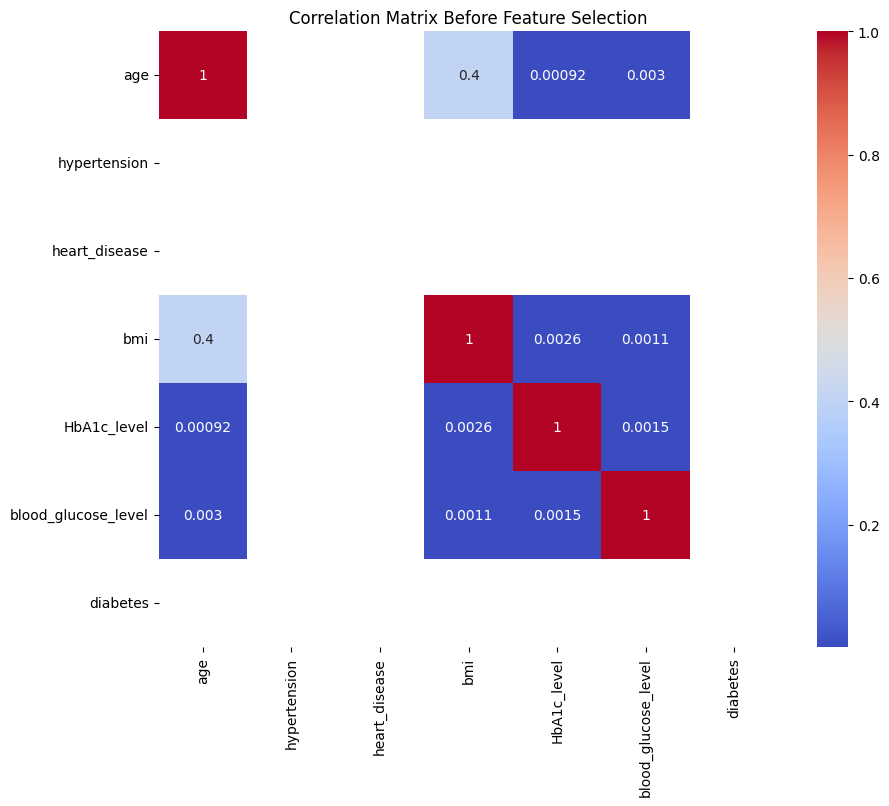

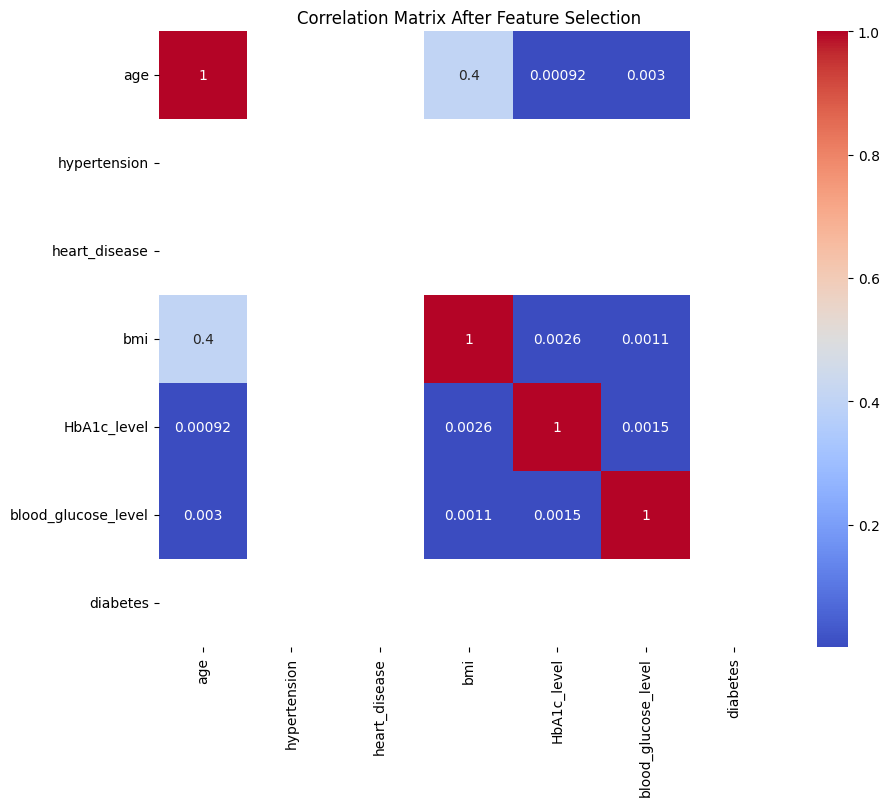

In [ ]:
numeric_df = df_clean.select_dtypes(include=[np.number])
before = numeric_df.corr().abs()

plt.figure(figsize=(10, 8))
sns.heatmap(before, annot=True, cmap='coolwarm')
plt.title("Corr before")
plt.show()


numeric_df_select = df_selected.select_dtypes(include=[np.number])
after = numeric_df_select.corr().abs()

plt.figure(figsize=(10, 8))
sns.heatmap(after, annot=True, cmap='coolwarm')
plt.title("Corr After")
plt.show()


# Task 3: Data Preparation

1.   Split the dataset into training, testing, and validation sets (if required).
2.   Experiment with all different train-test split ratios ( 70-30, 80-20, 60-40,50-50).
1.   Prepare the dataset for Logistic Regression training.

In [ ]:
from sklearn.model_selection import train_test_split


X = df_selected.drop(columns=['diabetes'])
y = df_selected['diabetes']


split_ratios = {
    "70-30": 0.30,
    "80-20": 0.20,
    "60-40": 0.40,
    "50-50": 0.50
}


datasets = {}

for split_name, test_size in split_ratios.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    datasets[split_name] = (X_train, X_test, y_train, y_test)
    print(f"{split_name} split: X_train shape = {X_train.shape}, X_test shape = {X_test.shape}")




70-30 split: X_train shape = (55045, 9), X_test shape = (23592, 9)
80-20 split: X_train shape = (62909, 9), X_test shape = (15728, 9)
60-40 split: X_train shape = (47182, 9), X_test shape = (31455, 9)
50-50 split: X_train shape = (39318, 9), X_test shape = (39319, 9)


In [ ]:
X_train30,X_test30,y_train30,y_test30=train_test_split(X,y,test_size=0.3,random_state=42)
X_train20,X_test20,y_train20,y_test20=train_test_split(X,y,test_size=0.2,random_state=42)
X_train40,X_test40,y_train40,y_test40=train_test_split(X,y,test_size=0.4,random_state=42)
X_train50,X_test50,y_train50,y_test50=train_test_split(X,y,test_size=0.5,random_state=42)

In [ ]:
class LogRegression:
    def __init__(self, lr=0.1, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)


            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)


            self.weights -= self.lr * dw
            self.bias -= self.lr * db


            loss = - (1 / n_samples) * np.sum(
                y * np.log(y_predicted + 1e-8) + (1 - y) * np.log(1 - y_predicted + 1e-8)
            )
            self.loss_history.append(loss)
    
            
            
    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        prob = self.predict_prob(X)
        return np.where(prob > threshold, 1, 0)

# Task 4: Model Building – Logistic Regression from Scratch
1.   Implement Logistic Regression manually without using built-in ML libraries for core operations.
2.   Choose and justify an appropriate Gradient Descent Optimization method based on the dataset.
1.   Train the model and display the convergence of loss over iterations.

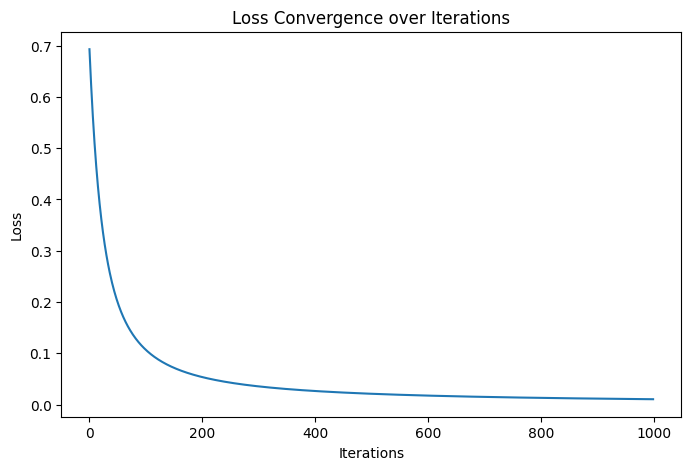

In [ ]:

from sklearn.preprocessing import StandardScaler
# get dummy encoding
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='inner', axis=1)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)


model = LogRegression(lr=0.1, n_iters=1000)
model.fit(X_train_scaled, y_train.values)
#simple LR plot
plt.figure(figsize=(8, 5))
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Convergence over Iterations")
plt.show()


appropriate Gradient Descent Optimization method as MiniBatch Gradient Descent as Dataset is very large and GD will take time, SGD is known to update faster but can have performance issue (leartning rate wil need to be tuned) ;   due to limited time MBGD us more justified

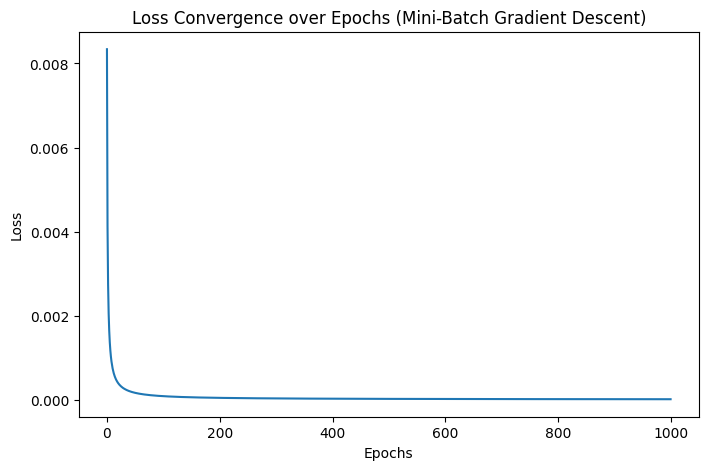

In [ ]:
class LogisticRegressionMB:
    def __init__(self, lr=0.1, n_iters=1000, batch_size=32):
        self.lr = lr
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iters):
            permutations = np.arange(n_samples)
            np.random.shuffle(permutations)
            X_shuffled = X[permutations]
            y_shuffled = y[permutations]
            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_predicted = self.sigmoid(linear_model)
                dw = (1 / X_batch.shape[0]) * np.dot(X_batch.T, (y_predicted - y_batch))
                db = (1 / X_batch.shape[0]) * np.sum(y_predicted - y_batch)
                self.weights -= self.lr * dw
                self.bias -= self.lr * db


            linear_model_full = np.dot(X, self.weights) + self.bias
            y_pred_full = self.sigmoid(linear_model_full)
            loss = - (1 / n_samples) * np.sum(
                y * np.log(y_pred_full + 1e-15) + (1 - y) * np.log(1 - y_pred_full + 1e-15)
            )
            self.loss_history.append(loss)
            
            
    # implementing SGD just in case       -- not complete 
    def SGD(self,X,y):
        
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iters):
            permutations = np.arange(n_samples)
            
            for i in range(n_samples):
                
                linear_model = np.dot(X[i], self.weights) + self.bias
                y_predicted = self.sigmoid(linear_model)
                dw = (1 / X[i].shape[0]) * np.dot(X[i].T, (y_predicted - X[i]))
                db = (1 / X[i].shape[0]) * np.sum(y_predicted - y[i])
                self.weights -= self.lr * dw
                self.bias -= self.lr * db


            linear_model_full = np.dot(X, self.weights) + self.bias
            y_pred_full = self.sigmoid(linear_model_full)
            loss = - (1 / n_samples) * np.sum(
                y * np.log(y_pred_full + 1e-15) + (1 - y) * np.log(1 - y_pred_full + 1e-15)
            )
            self.loss_history.append(loss)
            
    # simple getting probabilities for prediction by LG, then sigmoid fun passing
    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    #prediction by 0.5 threshold
    def predict(self, X, threshold=0.5):
        prob = self.predict_prob(X)
        return np.where(prob > threshold, 1, 0)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

MB_log = LogisticRegressionMB(lr=0.1, n_iters=1000, batch_size=32)
MB_log.fit(X_train_scaled, y_train.values)


plt.figure(figsize=(8, 5))
plt.plot(MB_log.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence over Epochs (Mini-Batch Gradient Descent)")
plt.show()


Train the model and display the convergence

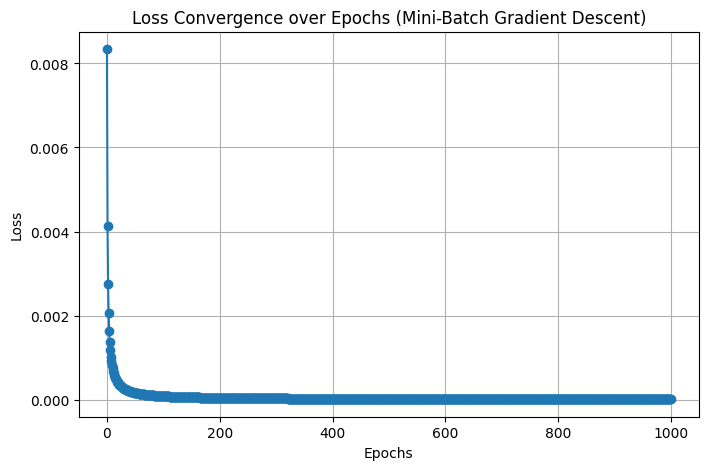

In [ ]:

X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='inner', axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)


MB_log = LogisticRegressionMB(lr=0.1, n_iters=1000, batch_size=32)
MB_log.fit(X_train_scaled, y_train.values)


plt.figure(figsize=(8, 5))
plt.plot(MB_log.loss_history, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence over Epochs (Mini-Batch Gradient Descent)")
plt.grid(True)
plt.show()


# Task 5: Model Evaluation & Performance Analysis


1.   Evaluate model performance using below metrics:

          *   Accuracy
          *   Precision
          *   Recall
          *   F1-score
          *   R2
2.   Compare model performance across different train-test split ratios and discuss the impact on results with and without feature selection.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

y_pred = MB_log.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, MB_log.predict_prob(X_test_scaled))

print(f"Accuracy : {accuracy}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"F1-Score : {f1}")
print(f"R2 Score : {r2}") #?? how can it be used for classification


Evaluation Metrics on the Test Set:
Accuracy : 1.000
Precision: 0.000
Recall   : 0.000
F1-Score : 0.000
R2 Score : 0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SPLIT RATIO AND FEATURE SELECTION COMPARISON with LogRegression 

In [ ]:

split_ratios = {
    "70-30": 0.30,
    "80-20": 0.20,
    "60-40": 0.40,
    "50-50": 0.50
}


print("### WITH Feature Selection ###")
results_fs = {}

for ratio, test_size in split_ratios.items():
    
    # here with FS, using df_selected
    
    X_fs = df_selected.drop(columns=['diabetes'])
    y_fs = df_selected['diabetes']
    X_fs = pd.get_dummies(X_fs, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X_fs, y_fs, test_size=test_size, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model_fs = LogRegression(lr=0.1, n_iters=1000)
    model_fs.fit(X_train_scaled, y_train.values)

    y_pred = model_fs.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
  
    r2 = r2_score(y_test, model_fs.predict_prob(X_test_scaled))

    results_fs[ratio] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "R2": r2
    }

results_fs_df = pd.DataFrame(results_fs).T
print(results_fs_df)
print("\n")
print("\n")
print("\n")
print('##############################')
print("### WITHOUT Feature Selection ###")
results_nfs = {}

for ratio, test_size in split_ratios.items():
    
    # here without FS, using df_clean, rest same ass before 
    X_nfs = df_clean.drop(columns=['diabetes'])
    y_nfs = df_clean['diabetes']
    X_nfs = pd.get_dummies(X_nfs, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X_nfs, y_nfs, test_size=test_size, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model_nfs = LogRegression(lr=0.1, n_iters=1000)
    model_nfs.fit(X_train_scaled, y_train.values)
    y_pred = model_nfs.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    r2 = r2_score(y_test, model_nfs.predict_prob(X_test_scaled))

    results_nfs[ratio] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "R2": r2
    }

results_nfs_df = pd.DataFrame(results_nfs).T
print(results_nfs_df)


### Results WITH Feature Selection ###



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py

       Accuracy  Precision  Recall   F1   R2
70-30       1.0        0.0     0.0  0.0  0.0
80-20       1.0        0.0     0.0  0.0  0.0
60-40       1.0        0.0     0.0  0.0  0.0
50-50       1.0        0.0     0.0  0.0  0.0


### Results WITHOUT Feature Selection ###



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py

       Accuracy  Precision  Recall   F1   R2
70-30       1.0        0.0     0.0  0.0  0.0
80-20       1.0        0.0     0.0  0.0  0.0
60-40       1.0        0.0     0.0  0.0  0.0
50-50       1.0        0.0     0.0  0.0  0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


almost same results observed after many epochs=1000